In [12]:
import iris
import os
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import progressbar
from scipy.ndimage import label
from iris.coord_categorisation import add_season, add_month, add_day_of_year
import warnings
import datetime as dt
import pandas as pd

In [46]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    era5=iris.load('/scratch/tp28/eh6215/PBE/Monsoon_westerlies_hr0/era5*.nc')
    iris.util.equalise_attributes(era5)
    era5=era5.concatenate_cube()

    barpa=iris.load('/scratch/tp28/eh6215/PBE/Monsoon_westerlies_hr0/barpa*.nc')
    iris.util.equalise_attributes(barpa)
    barpa=barpa.concatenate_cube()

In [47]:
barpa,era5

(<iris 'Cube' of eastward_wind / (1) (time: 348; latitude: 283; longitude: 712)>,
 <iris 'Cube' of eastward_wind / (1) (time: 348; latitude: 181; longitude: 360)>)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


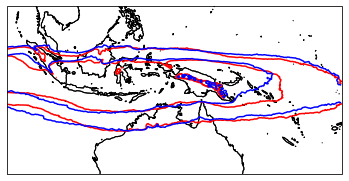

In [32]:
ct=iris.Constraint(time=lambda t: t.point.month in [1])
cx = iris.Constraint(longitude=lambda x: x<180)
ax=plt.subplot(111,projection=ccrs.PlateCarree(180))
#iplt.pcolormesh(BARPA.extract(ct&cx).collapsed('time',iris.analysis.MEAN))
iplt.contour(barpa.extract(ct&cx).collapsed('time',iris.analysis.MEAN),[0.2,0.5],colors='r')
ax.coastlines()
#ax=plt.subplot(212,projection=ccrs.PlateCarree(180))
#iplt.pcolormesh(ERA5.extract(ct&cx).collapsed('time',iris.analysis.MEAN))
iplt.contour(ERA5.extract(ct&cx).collapsed('time',iris.analysis.MEAN),[0.2,0.5],colors='b')

ax.coastlines()

In [16]:
nino = np.array([ -0.15,0.07, 0.05,0.09,0.13,0.17,-0.09,0.04,-0.2,0.21,0.48,0.32,0.35,0.69,
0.55,0.33,0.09,0.2,0.13,0.37,0.02,-0.23,-0.12,-0.11,0.1,0.36,
-0.45,-0.45,-0.02,-0.17,-0.11,-0.15,-0.43,-0.18,-0.07,-0.03,-0.27,0.07,
-0.04,-0.13,-0.02,0.24,0.65,0.92,0.64,0.93,1.39,2,2.07,2.33,
2.43,2.22,1.69,1.12,1.12,0.62,-0.11,-0.13,-0.5,-1.03,-1.13,-0.95,
-0.8,-0.53,-0.48,-0.6,-0.64,-0.9,-0.4,-0.4,-0.35,-0.83,-1.18,-1.53,
-0.89,-0.91,-0.96,-0.98,-0.9,-0.76,-0.61,-0.49,-0.57,-0.64,-0.43,-0.4,
-0.79,-0.64,-0.51,-0.41,-0.47,-0.08,0.16,0.24,0.59,0.9,1.04,0.98,
1.19,1.17,1.24,0.89,0.91,1.24,1.34,1.48,1.53,1.36,1.29,1.05,
0.69,0.35,0.29,-0.49,-1.05,-1.46,-1.54,-1.44,-1.33,-2.09,-2.18,-1.98,
-1.95,-1.37,-1.33,-1.11,-0.8,-0.64,-0.47,-0.58,-0.38,-0.4,-0.3,-0.13,
0.02,0.36,0.2,0.26,0.32,0,0.15,0.17,0.12,0.13,0.08,0.32,
0.51,0.32,0.1,0.21,0.44,0.65,0.62,0.43,0.22,0.91,1.14,1.62,
1.61,1.62,1.5,1.41,1.27,0.53,0.27,-0.15,-0.14,-0.35,-0.14,0.04,
0.28,0.42,0.47,0.92,0.93,0.64,0.33,0.16,0.26,0.36,0.28,0.19,
0.03,-0.16,-0.06,0.03,0.14,0.27,0.16,0.52,0.4,0.9,1.14,1.21,
1.1,0.87,0.49,0.27,0.03,0.08,0.03,-0.38,-0.57,-0.72,-0.78,-0.72,
-0.65,-0.66,-0.48,-0.34,-0.4,-0.12,-0.14,-0.3,-0.34,-0.28,-0.3,-0.43,
-0.43,-0.24,-0.06,0.34,0.87,1.15,1.6,1.94,2.1,2.29,2.42,2.3,
2.42,2.08,1.49,0.9,0.68,-0.39,-0.73,-0.83,-0.82,-1.19,-1.23,-1.51,
-1.53,-1.41,-0.92,-0.81,-0.87,-0.95,-0.84,-0.98,-0.84,-1.03,-1.41,-1.54,
-1.79,-1.53,-1.26,-0.8,-0.8,-0.75,-0.57,-0.36,-0.39,-0.55,-0.75,-0.92,
-0.88,-0.63,-0.48,-0.3,-0.3,-0.11,0.01,-0.07,-0.28,-0.26,-0.28,-0.46,
-0.14,0,0.11,0.14,0.21,0.68,0.57,0.7,0.82,1.16,1.41,1.41,
0.98,0.64,0.48,-0.03,-0.52,-0.19,0.14,0.05,0.15,0.46,0.39,0.32,
0.26,0.17,-0.1,0.06,0.1,0.14,0.41,0.66,0.67,0.73,0.62,0.71,
0.56,0.26,0.28,0.28,0.3,0.22,-0.01,-0.04,-0.08,-0.15,-0.44,-0.75,
-0.98,-0.71,-0.73,-0.3,-0.11,0.09,0.03,0.37,0.63,0.76,0.98,1.1,
0.59,0.12,-0.15,-0.16,-0.39,-0.16,-0.37,-0.57,-1.04,-1.4,-1.58,-1.61,
-1.79,-1.7,-1.17,-0.89,-0.64,-0.44,-0.04,-0.04,-0.28,-0.3,-0.37,-0.9,
-1,-0.71,-0.72,-0.25,0.17,0.49,0.69,0.62,0.68,0.96,1.49,1.81,
1.43,1.18,1.07,0.56,-0.15,-0.62,-0.89,-1.33,-1.56,-1.65,-1.57,-1.63,
-1.7,-1.26,-0.98,-0.74,-0.53,-0.25,-0.23,-0.66,-0.76,-0.93,-1.09,-1.05,
-0.93,-0.61,-0.48,-0.29,-0.18,0.14,0.44,0.66,0.44,0.23,0.33,-0.13,
-0.42,-0.4,-0.14,-0.08,-0.28,-0.33,-0.28,-0.29,-0.09,-0.24,-0.02,-0.09,
-0.42,-0.45,-0.07,0.28,0.45,0.48,0.13,0.14,0.37,0.48,0.89,0.77,
0.59,0.57,0.48,0.9,1.04,1.28,1.56,1.87,2.01,2.21,2.57,2.56,
2.56,2.11,1.6,1.05,0.45,0.06,-0.25,-0.48,-0.46,-0.75,-0.63,-0.51,
-0.34,-0.01,-0.09,0.22,0.3,0.22,0.22,-0.18,-0.56,-0.52,-0.84,-0.85,
-0.86,-0.73,-0.73,-0.36,-0.12,0.12,0.27,0.05,0.3,0.84,1,0.97,
0.51,0.62,0.81,0.67,0.61,0.66,0.41,0.19,0.11,0.55,0.74,0.51,
0.64,0.48,0.36,0.49,-0.12,-0.21,-0.04,-0.42,-0.66,-1.19,-1.01,-0.98])
nino = np.convolve(nino,np.ones(5)/5,mode='valid')
time = [dt.datetime(1979+i//12,i%12+1,1) for i in range(len(nino))]
nino = pd.Series(nino,index=time)

In [19]:
iris.Constraint(time=lambda t: t.point.month 

NameError: name 'barpa' is not defined

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:

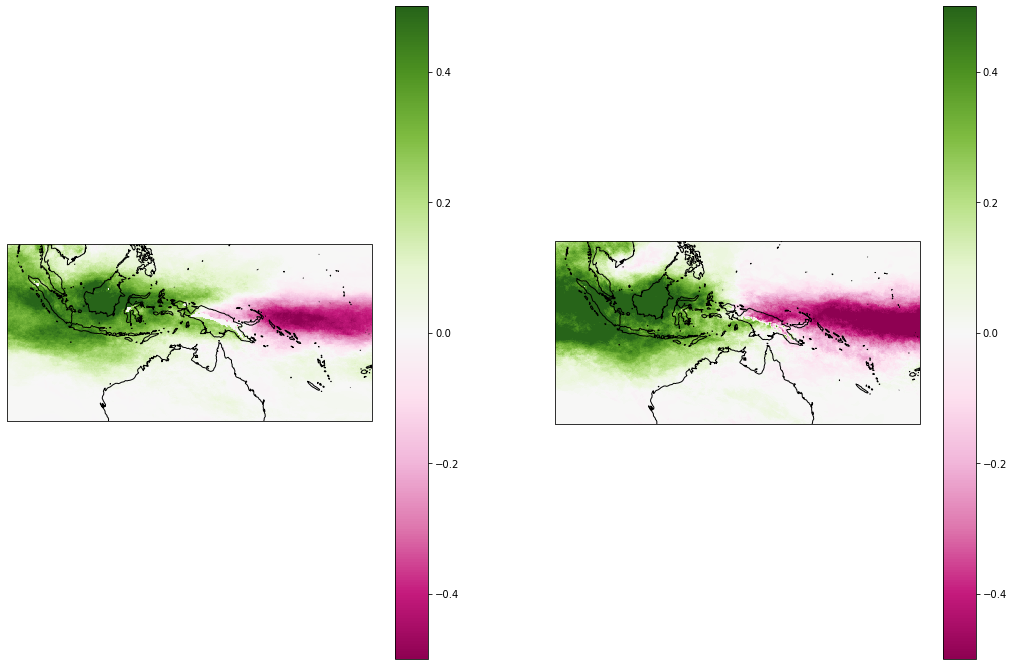

In [53]:
plt.figure(figsize=(18,12))
ct1=iris.Constraint(time=lambda t: t.point.month in [3,4,5] and nino[dt.datetime(t.point.year,t.point.month,1)]<-1)
ct2=iris.Constraint(time=lambda t: t.point.month in [3,4,5] and nino[dt.datetime(t.point.year,t.point.month,1)]>1)
cx = iris.Constraint(longitude=lambda x: x<180)
ax=plt.subplot(121,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(barpa.extract(ct1&cx).collapsed('time',iris.analysis.MEAN) - barpa.extract(ct2&cx).collapsed('time',iris.analysis.MEAN),vmin=-0.5,vmax=0.5,cmap='PiYG')
plt.colorbar()
ax.coastlines()
ax=plt.subplot(122,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(ERA5.extract(ct1&cx).collapsed('time',iris.analysis.MEAN) - ERA5.extract(ct2&cx).collapsed('time',iris.analysis.MEAN),vmin=-0.5,vmax=0.5,cmap='PiYG')
plt.colorbar()
ax.coastlines()


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/cube.py:3696: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/cube.py:3696: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib

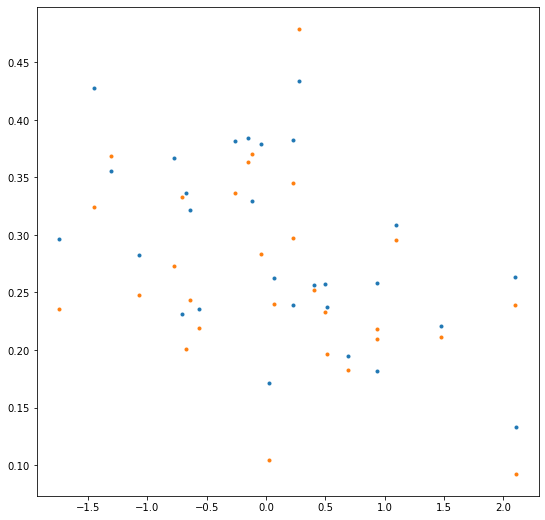

In [80]:
plt.figure(figsize=(9,9))

#plt.subplot(111,aspect=1)
cy2 = iris.Constraint(latitude=lambda x: -20<=x<=-10)
cx2 = iris.Constraint(longitude=lambda x: 122<=x<=145)
b = barpa.extract(cx2&cy2)[:].collapsed(['longitude','latitude'],iris.analysis.MEAN).data
e = era5.extract(cx2&cy2)[:].collapsed(['longitude','latitude'],iris.analysis.MEAN).data
n = nino[:348].values
n = (n[11:-12:12]+n[12::12]+n[13::12])/3
b = (b[11:-12:12]+b[12::12]+b[13::12])/3
e = (e[11:-12:12]+e[12::12]+e[13::12])/3
plt.plot(n,b,'.')
plt.plot(n,e,'.')
#plt.xlim(0,0.5)
#plt.ylim(0,0.5)
#plt.plot([0,0.5],[0,0.5])

In [75]:
era5

<iris 'Cube' of eastward_wind / (1) (time: 348; latitude: 181; longitude: 360)>